In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import json

## Plot LMP

In [53]:
res_dir = "/Users/hanshu/Desktop/Price_formation/Result"

run_dates = {"DR" : datetime(2024,10,18).strftime("%Y-%m-%d"),
            "SB" : datetime(2024,10,19).strftime("%Y-%m-%d"), 
            "PF" : datetime(2024,10,19).strftime("%Y-%m-%d"),
            "NR" : datetime(2024,10,18).strftime("%Y-%m-%d"),
            "WF" : datetime(2024,10,18).strftime("%Y-%m-%d"),
            "BF" : datetime(2024,10,25).strftime("%Y-%m-%d"),
            "BF2" : datetime(2024,10,25).strftime("%Y-%m-%d"),}

In [57]:
from datetime import datetime
import collections
LMPS = {}
min_LMP = collections.defaultdict(list)
time_index = None
min_time_index = None
for POLICY in run_dates.keys():
    rundate = run_dates[POLICY]
    filedate = datetime(2019,1,1).strftime("%Y-%m-%d")
    file = os.path.join(res_dir, "Master_"+POLICY, POLICY+'_'+rundate, f"UC_{filedate}.json")
    ed_file = os.path.join(res_dir, "Master_"+POLICY, 'ED_'+POLICY+'_'+rundate, f"ED_{filedate}.json")
    with open(file, 'r') as f:
        data = json.load(f)
        LMPS[POLICY] = data['Hourly average LMP']
        time_index = data['Time']
    with open(ed_file, 'r') as f:
        data = json.load(f)
        for d in data['LMP']:
            min_LMP[POLICY].extend(d)

In [58]:

import math
min_len = min([len(LMPS[key]) for key in LMPS.keys()])
LMPS = {key: LMPS[key][:min_len] for key in LMPS.keys()}
LMP_df = pd.DataFrame(LMPS)
LMP_df['Time'] = time_index
LMP_df.Time = pd.to_datetime(LMP_df.Time)
new_order = ['Time', 'SB', 'PF', 'NR', 'BF', 'BF2', 'WF', 'DR']
LMP_df = LMP_df[new_order]
LMP_df = LMP_df.rename(columns={"SB":"SB", "PF":"PF", "NR":"MF", "BF":"BF", "BF2":"BF2", "WF":"WF", "DR":"DR"})

In [60]:
LMP_df.describe().round(2)

,Time,SB,PF,MF,BF,BF2,WF,DR
count,497,497.00,497.00,497.00,497.00,497.00,497.00,497.00
mean,2019-01-11 08:00:00,26.21,27.86,38.58,26.12,26.53,23.67,32.43
min,2019-01-01 00:00:00,-19.68,0.00,-8.87,-26.32,-27.54,-32.61,-1.60
25%,2019-01-06 04:00:00,27.73,28.23,27.96,27.35,27.37,25.12,27.99
50%,2019-01-11 08:00:00,28.69,28.74,29.10,28.36,28.40,27.97,29.14
75%,2019-01-16 12:00:00,30.60,31.23,31.37,30.38,30.47,29.61,31.29
max,2019-01-21 16:00:00,38.79,167.67,1925.49,447.66,343.96,35.34,799.83
std,NaN,9.14,9.94,101.54,21.54,18.43,10.62,47.13


In [12]:
min_len = min([len(min_LMP[POLICY]) for POLICY in min_LMP.keys()])
min_LMP = {POLICY : min_LMP[POLICY][:min_len] for POLICY in min_LMP.keys()}
min_time_index = pd.date_range(start='2019-01-01', periods=min_len, freq='5T')
min_LMP_df = pd.DataFrame(min_LMP, index=min_time_index)

In [20]:
min_LMP_df = min_LMP_df.rename(columns={"SB":"SB", "PF":"PF", "NR":"MF", "BF":"BF", "WF":"WF", "DR":"DR"})
min_LMP_df.describe().round(2)

,DR,SB,PF,MF,WF,BF
count,5964.00,5964.00,5964.00,5964.00,5964.00,5964.00
mean,32.43,26.21,27.86,38.58,23.67,26.12
std,61.99,9.60,22.09,131.84,11.01,65.34
min,-19.26,-30.28,0.00,-22.34,-32.61,-31.12
25%,28.00,27.88,28.00,28.00,24.52,27.72
50%,28.69,28.65,28.69,28.69,28.00,28.35
75%,31.47,30.53,31.52,31.52,30.22,30.53
max,1657.82,120.22,1585.34,5000.00,37.74,5000.00


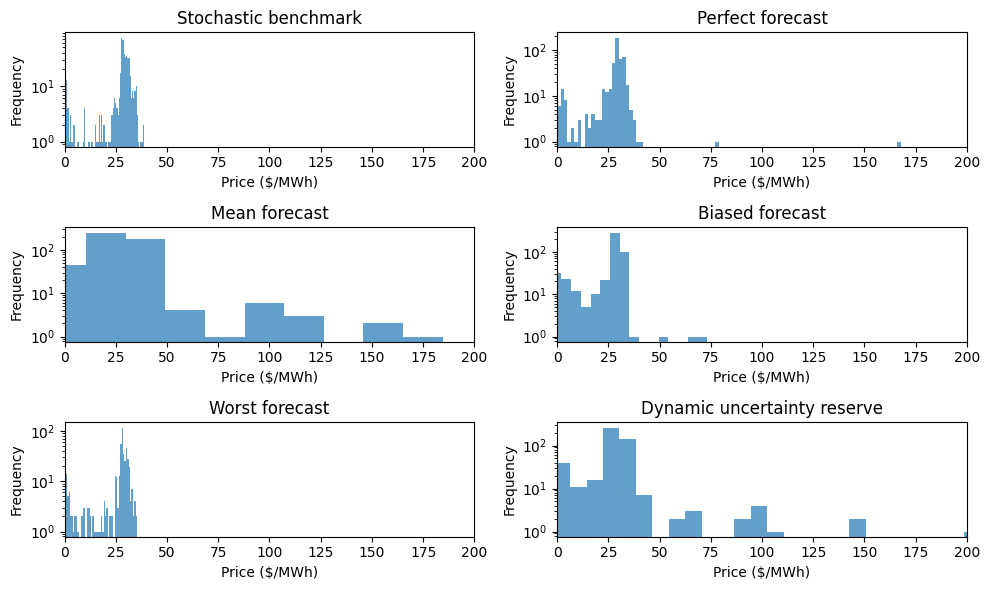

In [142]:
policy_names = {"SB": "Stochastic benchmark",
                "PF": "Perfect forecast", 
                "MF": "Mean forecast", 
                "BF":"Biased forecast", 
                "WF": "Worst forecast", 
                "DR":"Dynamic uncertainty reserve"}
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(6):
    ax[i//2, i%2].hist(LMP_df.iloc[:,i+1], bins=100, alpha=0.7)
    ax[i//2, i%2].set_title(policy_names[LMP_df.columns[i+1]])
    ax[i//2, i%2].set_xlabel("Price ($/MWh)")
    ax[i//2, i%2].set_ylabel("Frequency")
    ax[i//2, i%2].set_yscale('log')
    # ax[i//2, i%2].set_xlim(0, 200)
    # ax[i//2, i%2].grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


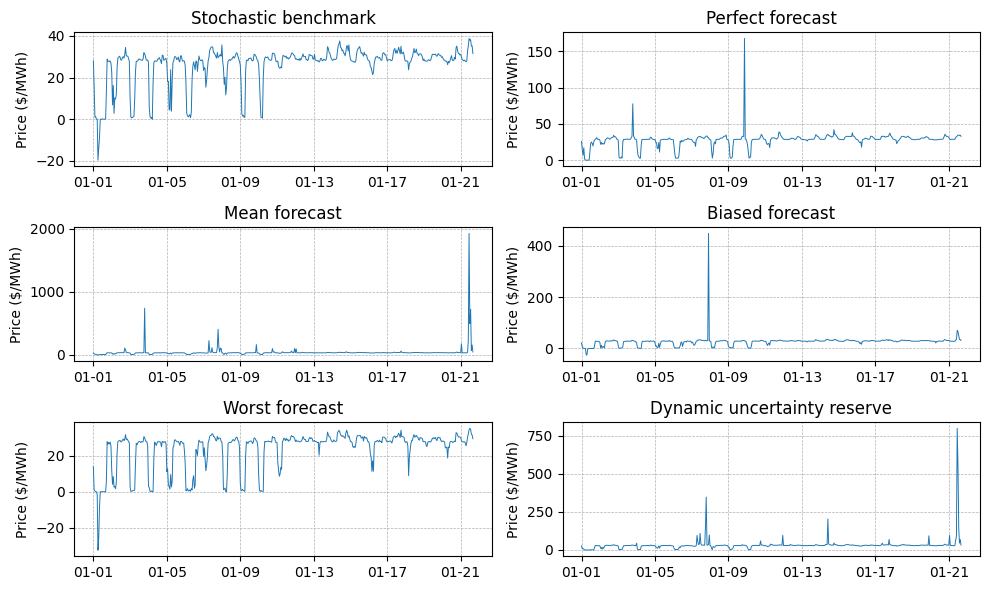

In [132]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(6):
    ax[i//2, i%2].plot(LMP_df.Time, LMP_df.iloc[:,i+1], linewidth=0.7)
    ax[i//2, i%2].set_title(policy_names[LMP_df.columns[i+1]])
    ax[i // 2, i % 2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax[i // 2, i % 2].tick_params(axis='x')
    ax[i//2, i%2].set_ylabel("Price ($/MWh)")
    ax[i//2, i%2].grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [5]:
# POLICY = "WF"
# rundate = datetime(2024,10,20).strftime("%Y-%m-%d")
# filedate = datetime(2019,1,1).strftime("%Y-%m-%d")
# file = os.path.join(res_dir, "Master_"+POLICY, POLICY+'_'+rundate, f"UC_{filedate}.json")
# with open(file, 'r') as f:
#     data = json.load(f)
#     LMPS["WF2"] = data['Hourly average LMP']

In [127]:
min_len

497

In [111]:
df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Result/revenue_cost.csv')
custom_order = [1,5,3,4,2,0]  # New order based on index
df = df.loc[custom_order].reset_index(drop=True)
df.at[2, 'POLICY'] = 'MF'
df

,POLICY,Gen_energy_revenue,Gen_reserve_revenue,Fast_gen_profits,Nuclear_profits,Storage_profits,Thermal_profits,All_gen_profits,TotalCosts,Load_curtailment,Genfuel_cost,Gen_integer_cost,Load_curtailment_penalty,Wind_curt,Solar_curt
0,SB,2.462093e+08,2.778161e+04,6.066836e+06,6.486118e+07,3.478457e+07,5.951285e+07,1.545985e+08,9.163857e+07,-3.224680e-12,9.001847e+07,1620097.80,-1.612340e-08,9477.475069,775.465602
1,PF,2.603418e+08,2.797419e+05,6.406594e+06,6.925265e+07,3.697312e+07,7.103043e+07,1.721557e+08,8.846587e+07,0.000000e+00,8.755724e+07,908628.14,0.000000e+00,3710.044159,100.728346
2,MF,3.792863e+08,6.797808e+06,1.269021e+07,9.818595e+07,5.119546e+07,1.512863e+08,2.971584e+08,8.892778e+07,4.016182e-01,8.764818e+07,1277592.71,2.008091e+03,6906.004304,286.240769
3,BF,2.473527e+08,2.503324e+05,6.175360e+06,6.462240e+07,3.466782e+07,6.056701e+07,1.556980e+08,9.190776e+07,5.392547e-01,9.026570e+07,1639373.29,2.696273e+03,9339.631909,701.188974
4,WF,2.246379e+08,2.620000e+02,5.691755e+06,5.806916e+07,3.143272e+07,4.305576e+07,1.290016e+08,9.563656e+07,0.000000e+00,9.315564e+07,2480910.90,0.000000e+00,13907.836709,856.057027
5,DR,3.081161e+08,3.666386e+06,9.299823e+06,8.059318e+07,4.254465e+07,1.041247e+08,2.226256e+08,8.915690e+07,0.000000e+00,8.777491e+07,1381992.41,0.000000e+00,6989.918130,313.505720


[Text(0.2, 0, 'SB'),
 Text(1.2, 0, 'PF'),
 Text(2.2, 0, 'MF'),
 Text(3.2, 0, 'BF'),
 Text(4.2, 0, 'WF'),
 Text(5.2, 0, 'DR')]

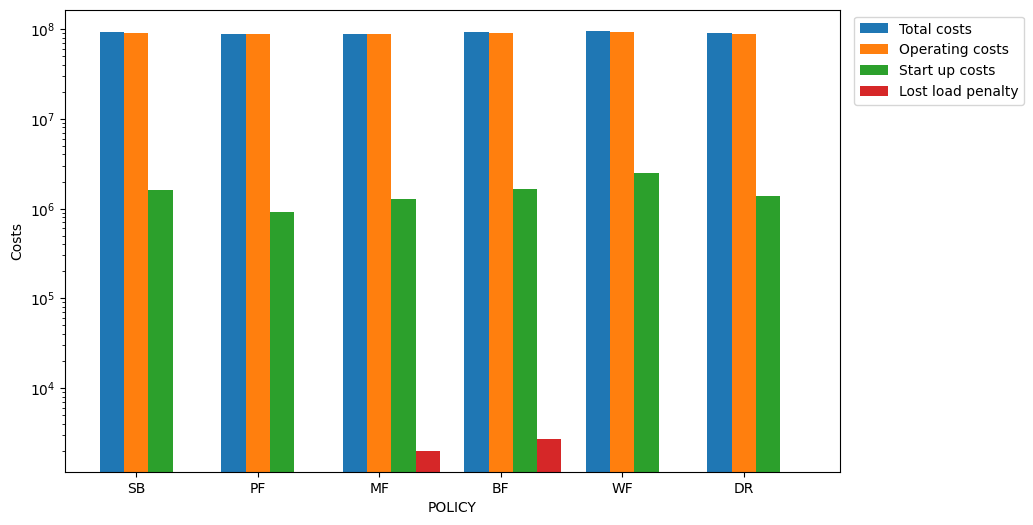

In [112]:
x = np.arange(len(df['POLICY']))
plotcols = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty']
colnames = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty']
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(4):
    ax.bar(x + i*width, df[plotcols[i]], width, label=colnames[i])
ax.set_xlabel('POLICY')
ax.set_ylabel('Costs')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_xticks(x + width)  # Centering the labels
ax.set_xticklabels(df['POLICY'])

[Text(0.2, 0, 'SB'),
 Text(1.2, 0, 'PF'),
 Text(2.2, 0, 'MF'),
 Text(3.2, 0, 'BF'),
 Text(4.2, 0, 'WF'),
 Text(5.2, 0, 'DR')]

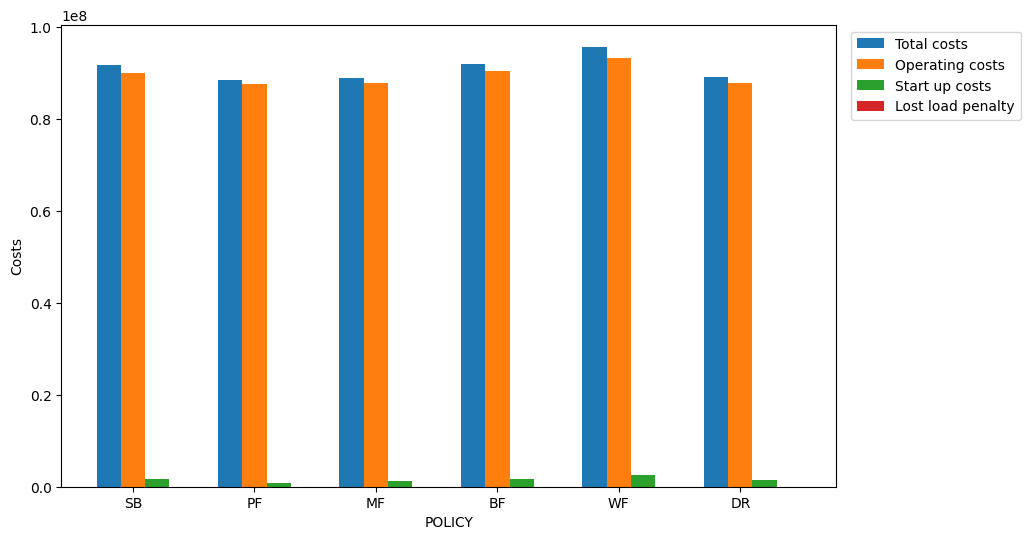

In [113]:
x = np.arange(len(df['POLICY']))
plotcols = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty']
colnames = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty']
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(4):
    ax.bar(x + i*width, df[plotcols[i]], width, label=colnames[i])
ax.set_xlabel('POLICY')
ax.set_ylabel('Costs')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_xticks(x + width)  # Centering the labels
ax.set_xticklabels(df['POLICY'])

In [114]:

df

,POLICY,Gen_energy_revenue,Gen_reserve_revenue,Fast_gen_profits,Nuclear_profits,Storage_profits,Thermal_profits,All_gen_profits,TotalCosts,Load_curtailment,Genfuel_cost,Gen_integer_cost,Load_curtailment_penalty,Wind_curt,Solar_curt
0,SB,2.462093e+08,2.778161e+04,6.066836e+06,6.486118e+07,3.478457e+07,5.951285e+07,1.545985e+08,9.163857e+07,-3.224680e-12,9.001847e+07,1620097.80,-1.612340e-08,9477.475069,775.465602
1,PF,2.603418e+08,2.797419e+05,6.406594e+06,6.925265e+07,3.697312e+07,7.103043e+07,1.721557e+08,8.846587e+07,0.000000e+00,8.755724e+07,908628.14,0.000000e+00,3710.044159,100.728346
2,MF,3.792863e+08,6.797808e+06,1.269021e+07,9.818595e+07,5.119546e+07,1.512863e+08,2.971584e+08,8.892778e+07,4.016182e-01,8.764818e+07,1277592.71,2.008091e+03,6906.004304,286.240769
3,BF,2.473527e+08,2.503324e+05,6.175360e+06,6.462240e+07,3.466782e+07,6.056701e+07,1.556980e+08,9.190776e+07,5.392547e-01,9.026570e+07,1639373.29,2.696273e+03,9339.631909,701.188974
4,WF,2.246379e+08,2.620000e+02,5.691755e+06,5.806916e+07,3.143272e+07,4.305576e+07,1.290016e+08,9.563656e+07,0.000000e+00,9.315564e+07,2480910.90,0.000000e+00,13907.836709,856.057027
5,DR,3.081161e+08,3.666386e+06,9.299823e+06,8.059318e+07,4.254465e+07,1.041247e+08,2.226256e+08,8.915690e+07,0.000000e+00,8.777491e+07,1381992.41,0.000000e+00,6989.918130,313.505720


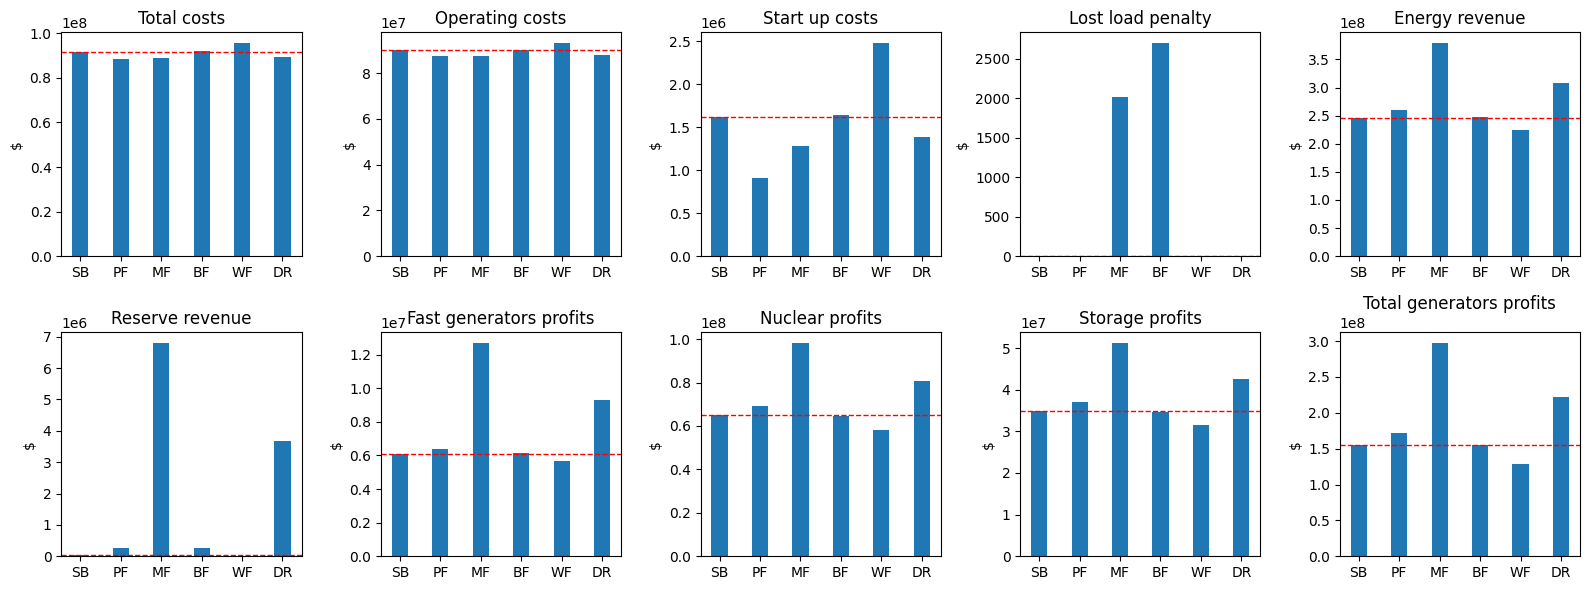

In [126]:
# plotcols = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty']
# colnames = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty']
columns = ['TotalCosts','Genfuel_cost', 'Gen_integer_cost', 'Load_curtailment_penalty', 'Gen_energy_revenue', 'Gen_reserve_revenue', 'Fast_gen_profits', 'Nuclear_profits', 'Storage_profits', 'All_gen_profits']
column_titles = ['Total costs','Operating costs', 'Start up costs', 'Lost load penalty', 'Energy revenue', 'Reserve revenue', 'Fast generators profits', 'Nuclear profits', 'Storage profits', 'Total generators profits']
x = np.arange(len(df['POLICY']))  # Label locations for categories
width = 0.4  # Width of each bar

# Plotting the bars
fig, ax = plt.subplots(2,5,figsize=(16,6))
for i in range(len(columns)):
    ax[i//5, i%5].bar(df['POLICY'], [df.iloc[j][columns[i]] for j in range(len(df))], width)
    ax[i//5, i%5].axhline(y=df.iloc[0][columns[i]], color='red', linestyle='--', linewidth=1) #plot(, linestyle = '--', color='red', label='Base case')
    ax[i//5, i%5].set_ylabel('$')
    ax[i//5, i%5].set_xticks(x)  # Centering the labels
    ax[i//5, i%5].set_title(column_titles[i])
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [42]:
perunint_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Result/PerUnitProfit.csv')
perunint_df.round(2)
custom_order = [1,5,3,4,2,0]  # New order based on index
perunint_df = perunint_df.loc[custom_order].reset_index(drop=True)
perunint_df.at[2, 'POLICY'] = 'MF'
perunint_df

,POLICY,Fast,Nuclear,Thermal,BA,PH,wind,solar,hydro
0,SB,1973.147455,11944.969166,1831.491424,13027.899396,13027.962560,7429.758541,1873.656239,9726.539230
1,PF,2083.648530,12753.710043,2185.941937,13847.608733,13847.608733,7946.019857,1898.006758,10340.896434
2,MF,4127.301642,18082.126155,4655.792655,19174.328725,19174.328725,12423.564888,3844.553462,14897.462150
3,BF,2008.443110,11900.994931,1863.933001,12983.065205,12985.659309,7439.429930,1872.688747,9757.162792
4,WF,1851.157711,10694.135741,1325.029002,11765.759325,11781.266195,6608.961601,1762.545465,8827.320612
5,DR,3024.627645,14842.205622,3204.407803,15934.325408,15934.325408,9502.451164,2688.967681,12165.854225


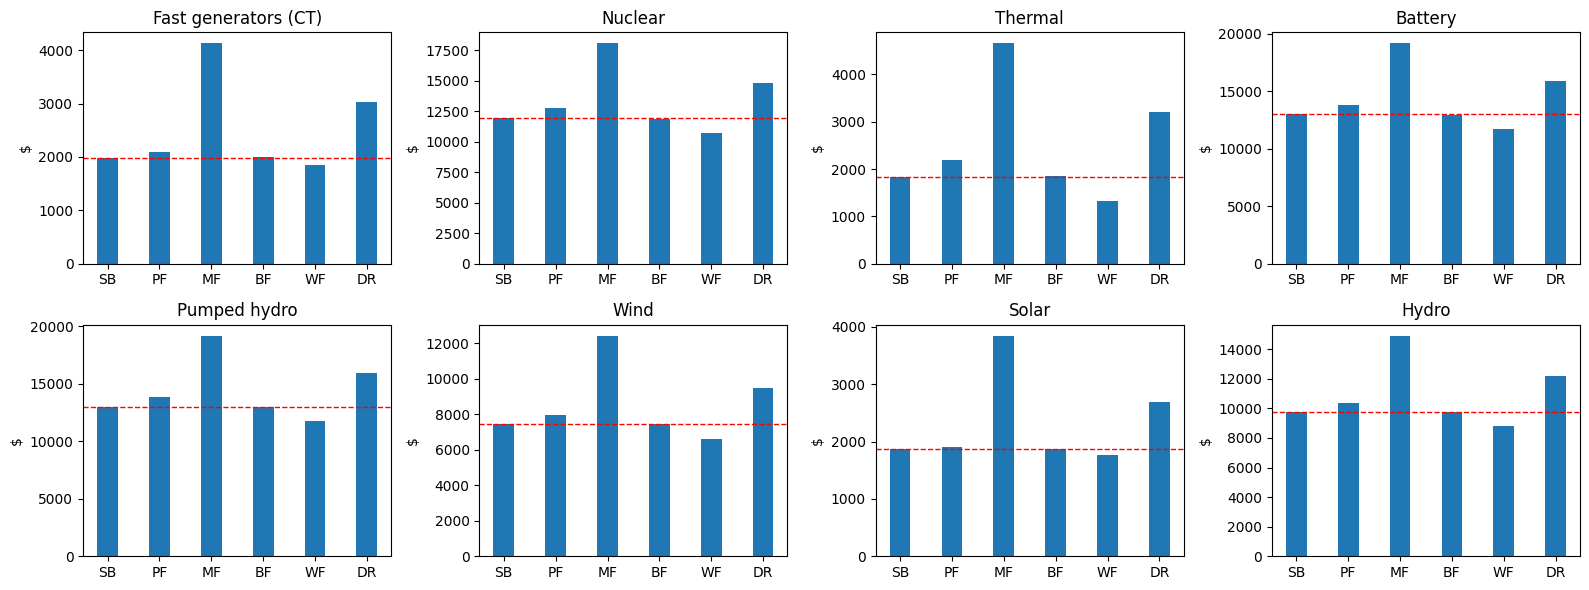

In [52]:
map_dict = {'Fast': 'Fast generators (CT)', 'Nuclear': 'Nuclear', 'Storage': 'Storage', 'PH':'Pumped hydro', 
            'BA':'Battery', 'solar':'Solar', 'wind':'Wind', 'hydro':'Hydro', 'Thermal':'Thermal'}
x = np.arange(len(perunint_df['POLICY']))  # Label locations for categories
width = 0.4  # Width of each bar

# Plotting the bars
fig, ax = plt.subplots(2,4,figsize=(16,6))
for i in range(len(perunint_df.columns)-1):
    ax[i//4, i%4].bar(perunint_df['POLICY'], [perunint_df.iloc[j][i+1] for j in range(len(perunint_df))], width)
    ax[i//4, i%4].axhline(y=perunint_df.iloc[0][i+1], color='red', linestyle='--', linewidth=1) #plot(, linestyle = '--', color='red', label='Base case')
    ax[i//4, i%4].set_ylabel('$')
    ax[i//4, i%4].set_xticks(x)  # Centering the labels
    ax[i//4, i%4].set_title(map_dict[perunint_df.columns[i+1]])
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [49]:
perunint_df.columns[3]

'Thermal'

In [30]:
hydro_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Data/NYGrid/hydro_2019.csv')
print("The maximum hydro generation is: ", hydro_df.Gen_MW.max())
wind_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Data/ARPAE_NYISO/Clean_CSV/Hour/wind_actuals_2019_hourly_BA.csv')
print("The maximum wind generation is: ", wind_df.BA_total.max())
solar_df = pd.read_csv('/Users/hanshu/Desktop/Price_formation/Data/ARPAE_NYISO/Clean_CSV/Hour/solar_actuals_2019_hourly_BA.csv')
print("The maximum solar generation is: ", solar_df.BA_total.max())

The maximum hydro generation is:  4738.0
The maximum wind generation is:  1798.6622698166666
The maximum solar generation is:  448.9000012899999


In [61]:
solar_df.describe().round(2)

,hour,BA_total
count,8760.00,8760.00
mean,11.50,88.89
std,6.92,126.62
min,0.00,0.00
25%,5.75,0.00
50%,11.50,2.23
75%,17.25,161.53
max,23.00,448.90


In [62]:
wind_df.describe().round(2)

,hour,BA_total
count,8760.00,8760.00
mean,11.50,899.19
std,6.92,552.29
min,0.00,0.45
25%,5.75,406.96
50%,11.50,883.94
75%,17.25,1412.01
max,23.00,1798.66
